### Traditional reflection structure

Data points and the polynomial curve fitted to them.

Fitted polynomial equation:
           5            4           3          2
3.316e-05 x - 0.002604 x + 0.07012 x - 0.7022 x + 0.4477 x + 76.49


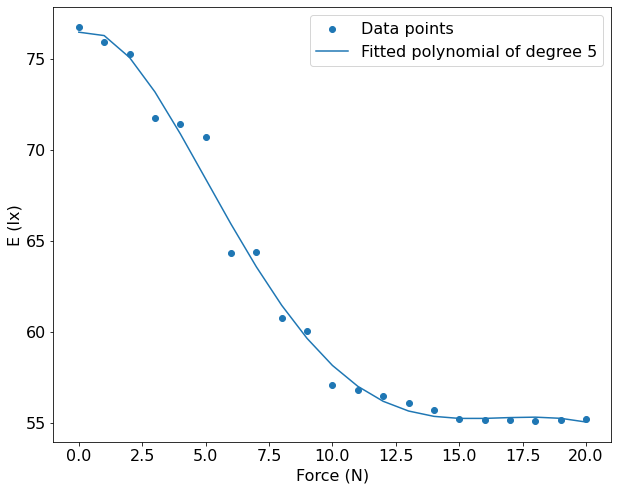

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    (0, 76.79),
    (1, 75.97),
    (2, 75.3),
    (3, 71.75),
    (4, 71.42),
    (5, 70.71),
    (6, 64.32),
    (7, 64.36),
    (8, 60.76),
    (9, 60.05),
    (10, 57.09),
    (11, 56.81),
    (12, 56.45),
    (13, 56.1),
    (14, 55.68),
    (15, 55.21),
    (16, 55.15),
    (17, 55.15),
    (18, 55.11),
    (19, 55.16),
    (20, 55.18),
]

x = np.array([point[0] for point in data])
y = np.array([point[1] for point in data])

# Fit a polynomial of degree n
n = 5
coefficients = np.polyfit(x, y, n)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Fitted polynomial equation:")
print(polynomial)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,8))
# Plot the data and the fitted curve
plt.scatter(x, y, label="Data points")
plt.plot(x, polynomial(x), label=f"Fitted polynomial of degree {n}")
plt.xlabel("Force (N)")
plt.ylabel("E (lx)")
plt.legend()
plt.show()


### Direct light structure

Data points and the polynomial curve fitted to them.

Fitted polynomial equation:
 
4.419 x + 31.18


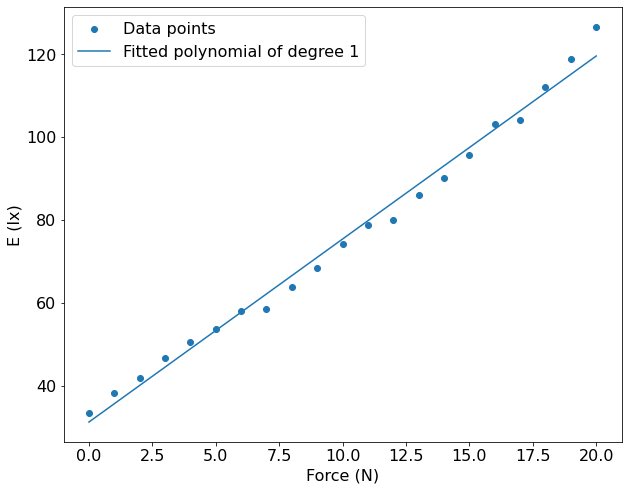

In [23]:
import numpy as np
import matplotlib.pyplot as plt


data = [
    (0, 33.45),
    (1, 38.11),
    (2, 41.9),
    (3, 46.74),
    (4, 50.47),
    (5, 53.67),
    (6, 57.94),
    (7, 58.46),
    (8, 63.9),
    (9, 68.44),
    (10, 74.23),
    (11, 78.74),
    (12, 80.08),
    (13, 85.96),
    (14, 90.13),
    (15, 95.7),
    (16, 103.24),
    (17, 104.15),
    (18, 112.01),
    (19, 118.92),
    (20, 126.65),
]

x = np.array([point[0] for point in data])
y = np.array([point[1] for point in data])

# Fit a polynomial of degree n
n = 1
coefficients = np.polyfit(x, y, n)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Fitted polynomial equation:")
print(polynomial)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,8))
# Plot the data and the fitted curve
plt.scatter(x, y, label="Data points")
plt.plot(x, polynomial(x), label=f"Fitted polynomial of degree {n}")
plt.xlabel("Force (N)")
plt.ylabel("E (lx)")
plt.legend()
plt.show()


### Minimum changing rate interval

Find the minimum changing rate interval to proof that the limits of tradition reflection structure: the sensitivity and max load can not perform well in the same time.

In [13]:
import numpy as np
from scipy.optimize import minimize_scalar

# Data
F_N = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Reflection_structure = np.array([76.79, 75.97, 75.3, 71.75, 71.42, 70.71, 64.32, 64.36, 60.76, 60.05, 57.09, 56.81, 56.45, 56.1, 55.68, 55.21, 55.15, 55.15, 55.11, 55.16, 55.18])

# Polynomial regression (degree 5)
coefficients = np.polyfit(F_N, Reflection_structure, 5)

# Define the polynomial function and its first derivative
poly_func = np.poly1d(coefficients)

def first_derivative(x):
    return 5 * coefficients[0] * x**4 + 4 * coefficients[1] * x**3 + 3 * coefficients[2] * x**2 + 2 * coefficients[3] * x + coefficients[4]

# Minimize the absolute value of the first derivative to find where the function changes very little
result = minimize_scalar(lambda x: abs(first_derivative(x)), bounds=(F_N.min(), F_N.max()), method='bounded')

print("Coefficients (p1, p2, p3, p4, p5, p6):", coefficients)
print(f"Interval where the equation changes very little: x ≈ {result.x}")

# Evaluate the first derivative at the minimum point
min_slope = first_derivative(result.x)

print(f"Minimum slope (how little the function changes) at x ≈ {result.x}: {min_slope}")

# Evaluate the first derivative at x = 1
slope_at_x_1 = first_derivative(1)

print(f"Slope (how little the function changes) at x = 1: {slope_at_x_1}")

# Evaluate the first derivative at x = 0
slope_at_x_0 = first_derivative(0)

print(f"Slope (how little the function changes) at x = 0: {slope_at_x_0}")



Coefficients (p1, p2, p3, p4, p5, p6): [ 3.31570491e-05 -2.60372898e-03  7.01213989e-02 -7.02229503e-01
  4.47687493e-01  7.64876753e+01]
Interval where the equation changes very little: x ≈ 15.452564400529841
Minimum slope (how little the function changes) at x ≈ 15.452564400529841: 1.411554367836132e-08
Slope (how little the function changes) at x = 1: -0.7566564467636427
Slope (how little the function changes) at x = 0: 0.44768749335193664


### Find the threshold

Find the threshold for the interval search.

In [16]:
import numpy as np

F_N = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Reflection_structure = np.array([76.79, 75.97, 75.3, 71.75, 71.42, 70.71, 64.32, 64.36, 60.76, 60.05, 57.09, 56.81, 56.45, 56.1, 55.68, 55.21, 55.15, 55.15, 55.11, 55.16, 55.18])

# Calculate the differences in consecutive Reflection_structure values
differences = np.abs(np.diff(Reflection_structure))

# Define the percentile to be used as the threshold
percentile = 25

# Calculate the threshold
threshold = np.percentile(differences, percentile)

print(f"Threshold based on {percentile}th percentile: {threshold}")


Threshold based on 25th percentile: 0.057500000000000995


### Find the interval

Find the interval where the rate of change becomes little

In [15]:
import numpy as np

F_N = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Reflection_structure = np.array([76.79, 75.97, 75.3, 71.75, 71.42, 70.71, 64.32, 64.36, 60.76, 60.05, 57.09, 56.81, 56.45, 56.1, 55.68, 55.21, 55.15, 55.15, 55.11, 55.16, 55.18])

# Calculate the differences in consecutive Reflection_structure values
differences = np.diff(Reflection_structure)

# Define a threshold for small differences
threshold = 0.5

# Find the interval where differences become consistently small
start_F_N, end_F_N = None, None
consecutive_small_diffs = 0

for i in range(len(differences)):
    if abs(differences[i]) <= threshold:
        consecutive_small_diffs += 1
        if consecutive_small_diffs == 1:
            start_F_N = F_N[i]
        end_F_N = F_N[i + 1]
    else:
        consecutive_small_diffs = 0

if start_F_N is not None and end_F_N is not None:
    print(f"Interval where the rate of change becomes little: F_N = {start_F_N} to F_N = {end_F_N}")
else:
    print("No interval found where the rate of change becomes consistently little.")


Interval where the rate of change becomes little: F_N = 10 to F_N = 20
